<a href="https://colab.research.google.com/github/Bhavana12S/facemaskdetection-/blob/main/facemaskdetection5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Importing Face Mask Dataset

In [3]:
#a API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 87% 142M/163M [00:01<00:00, 102MB/s]
100% 163M/163M [00:01<00:00, 96.8MB/s]


In [4]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split




In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_241.jpg', 'with_mask_1683.jpg', 'with_mask_3638.jpg', 'with_mask_2047.jpg', 'with_mask_3587.jpg']
['with_mask_2532.jpg', 'with_mask_3077.jpg', 'with_mask_503.jpg', 'with_mask_3502.jpg', 'with_mask_2142.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2753.jpg', 'without_mask_2669.jpg', 'without_mask_656.jpg', 'without_mask_2351.jpg', 'without_mask_3282.jpg']
['without_mask_1408.jpg', 'without_mask_3755.jpg', 'without_mask_2898.jpg', 'without_mask_3.jpg', 'without_mask_1541.jpg']


In [9]:
print("Number of with mask images",len(with_mask_files))
print("Number of without mask images",len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


Creating lables for the two class of images

with mask --> 1
without mask --> 0


In [10]:
#create the lables
with_mask_lable = [1]*3725

without_mask_lable = [0]*3828

In [11]:
print(with_mask_lable[0:5])

print(without_mask_lable[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_lable))

print(len(without_mask_lable))

3725
3828


In [13]:
labels = with_mask_lable + without_mask_lable

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


To know the shape of the image
Displaying images

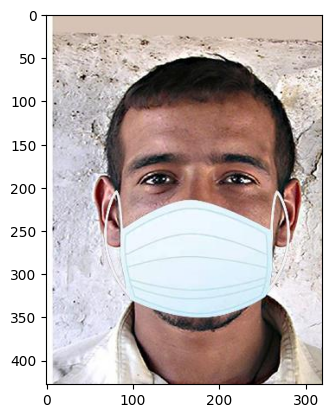

In [14]:
#displaying with mask image
img = mping.imread('/content/data/with_mask/with_mask_1672.jpg')
implot = plt.imshow(img)
plt.show()


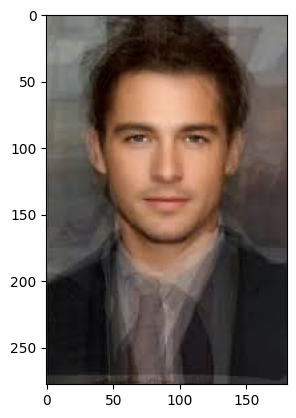

In [15]:
#displaying without mask image
img = mping.imread('/content/data/without_mask/without_mask_2122.jpg')
implot = plt.imshow(img)
plt.show()

Image processing

1.Resize the images
2.Convert images to numpy arrays

In [16]:
#convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data =[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'



for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[148, 195, 232],
        [144, 193, 229],
        [139, 189, 224],
        ...,
        [119, 151, 172],
        [124, 155, 174],
        [125, 156, 174]],

       [[147, 194, 232],
        [143, 191, 228],
        [136, 186, 222],
        ...,
        [116, 150, 170],
        [120, 153, 172],
        [121, 153, 172]],

       [[145, 193, 232],
        [140, 189, 228],
        [134, 184, 222],
        ...,
        [111, 146, 168],
        [115, 149, 170],
        [116, 150, 170]],

       ...,

       [[240, 248, 238],
        [240, 248, 237],
        [236, 244, 233],
        ...,
        [209, 200, 195],
        [210, 201, 196],
        [211, 202, 197]],

       [[239, 246, 238],
        [238, 246, 238],
        [237, 245, 235],
        ...,
        [209, 200, 195],
        [210, 201, 196],
        [210, 201, 196]],

       [[237, 244, 236],
        [237, 244, 236],
        [237, 244, 236],
        ...,
        [210, 201, 196],
        [211, 202, 197],
        [211, 202, 197]]], dtype=uint8)
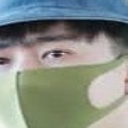

In [19]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
#converting image list and label list to numpy array

x=np.array(data)
y=np.array(labels)

In [22]:
type(y)

numpy.ndarray

In [23]:
type(x)

numpy.ndarray

In [24]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(y)

[1 1 1 ... 0 0 0]


Train test Split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
#scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

array([[[246, 249, 251],
        [246, 247, 251],
        [246, 245, 252],
        ...,
        [244, 245, 236],
        [243, 249, 233],
        [240, 248, 228]],

       [[245, 249, 249],
        [242, 242, 246],
        [242, 242, 247],
        ...,
        [241, 242, 237],
        [241, 244, 236],
        [239, 244, 232]],

       [[240, 244, 242],
        [244, 246, 245],
        [245, 246, 245],
        ...,
        [244, 243, 243],
        [242, 243, 239],
        [244, 244, 239]],

       ...,

       [[246, 245, 241],
        [248, 245, 242],
        [245, 239, 239],
        ...,
        [ 20,  25,  23],
        [ 25,  31,  29],
        [ 30,  37,  34]],

       [[249, 241, 250],
        [247, 240, 248],
        [249, 245, 248],
        ...,
        [ 32,  35,  34],
        [ 17,  22,  24],
        [ 29,  35,  36]],

       [[239, 230, 247],
        [239, 234, 243],
        [245, 245, 245],
        ...,
        [ 16,  19,  18],
        [ 10,  16,  13],
        [ 13,  18,  15]]], dtype=uint8)
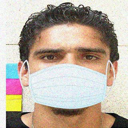

In [29]:
x_train[0]

In [30]:
x_train_scaled[0]

array([[[0.96470588, 0.97647059, 0.98431373],
        [0.96470588, 0.96862745, 0.98431373],
        [0.96470588, 0.96078431, 0.98823529],
        ...,
        [0.95686275, 0.96078431, 0.9254902 ],
        [0.95294118, 0.97647059, 0.91372549],
        [0.94117647, 0.97254902, 0.89411765]],

       [[0.96078431, 0.97647059, 0.97647059],
        [0.94901961, 0.94901961, 0.96470588],
        [0.94901961, 0.94901961, 0.96862745],
        ...,
        [0.94509804, 0.94901961, 0.92941176],
        [0.94509804, 0.95686275, 0.9254902 ],
        [0.9372549 , 0.95686275, 0.90980392]],

       [[0.94117647, 0.95686275, 0.94901961],
        [0.95686275, 0.96470588, 0.96078431],
        [0.96078431, 0.96470588, 0.96078431],
        ...,
        [0.95686275, 0.95294118, 0.95294118],
        [0.94901961, 0.95294118, 0.9372549 ],
        [0.95686275, 0.95686275, 0.9372549 ]],

       ...,

       [[0.96470588, 0.96078431, 0.94509804],
        [0.97254902, 0.96078431, 0.94901961],
        [0.96078431, 0

Building a convolutional neural network

In [31]:
import tensorflow as tf
from tensorflow import keras


In [32]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))



#output layer
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])



In [34]:
#training the neural network
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - acc: 0.6842 - loss: 0.6249 - val_acc: 0.8711 - val_loss: 0.3043
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8834 - loss: 0.3115 - val_acc: 0.8727 - val_loss: 0.2777
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9099 - loss: 0.2314 - val_acc: 0.8926 - val_loss: 0.2560
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9121 - loss: 0.2204 - val_acc: 0.8298 - val_loss: 0.4114
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9277 - loss: 0.1927 - val_acc: 0.9157 - val_loss: 0.2050


MODEL EVALUATION

In [35]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy =',accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9241 - loss: 0.2012
Test Accuracy = 0.9265387058258057


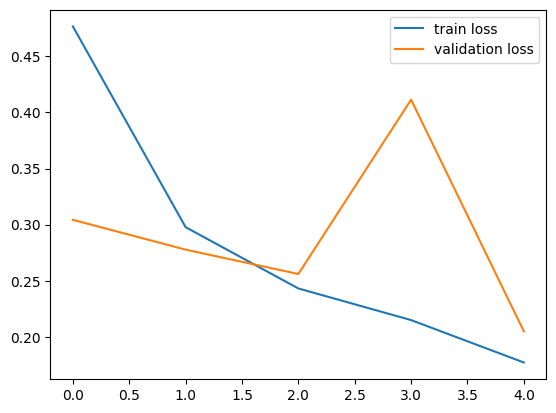

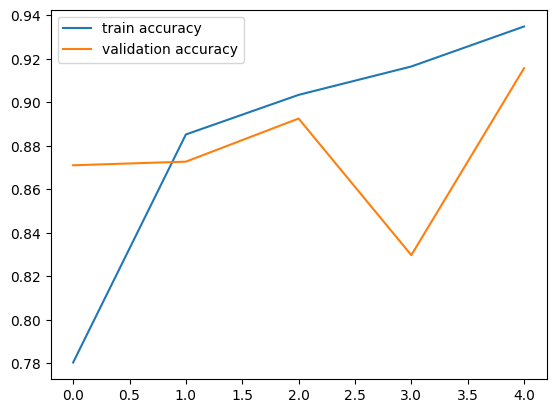

In [36]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

Predictive system

Path of the image to be predictaed:/content/download (1).jpeg


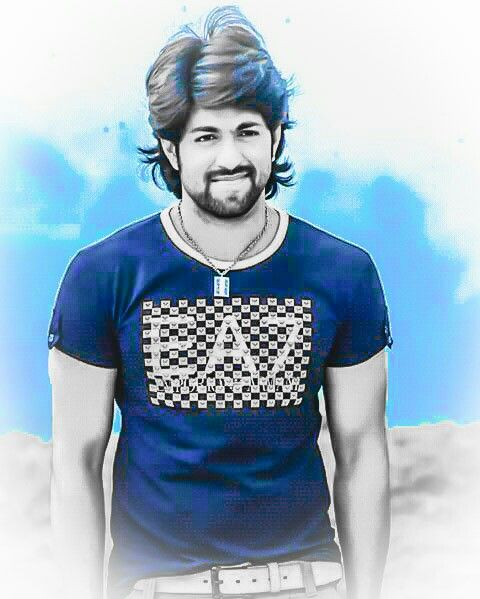

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.19905594 0.9370043 ]]
1
The person in the image is not wearing mask


In [41]:


input_image_path = input("Path of the image to be predictaed:")

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
  print('The person in the image is wearing mask')

else:
  print('The person in the image is not wearing mask')